<a href="https://colab.research.google.com/github/ram-elgov/Statistics-For-CS/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from scipy.stats import norm

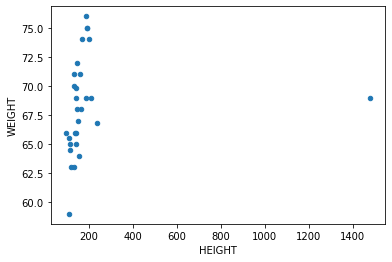

In [4]:
df = pd.read_csv("heights.csv")
df.plot.scatter("HEIGHT", "WEIGHT")

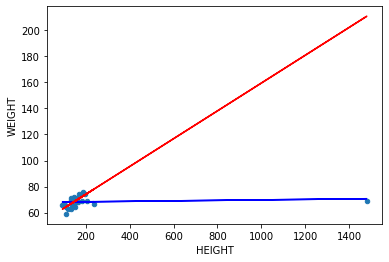

In [5]:
df.plot.scatter("HEIGHT", "WEIGHT")

heights, weights = df["HEIGHT"].values, df["WEIGHT"].values
heights_2d = heights.reshape(-1, 1)

# Least squares line (blue)
reg = LinearRegression()
reg.fit(heights_2d, weights)
predicted_weights_rss = reg.predict(heights_2d)
plt.plot(heights, predicted_weights_rss, color="blue")


# Resistant line (red)
x_h, x_l = np.quantile(heights, 5/6), np.quantile(heights, 1/6)
y_h, y_l = np.quantile(weights, 5/6), np.quantile(weights, 1/6)
slope_rl = (y_h - y_l) / (x_h - x_l)
a_rl = np.median([weight - slope_rl * height for weight, height in df.values])
predicted_weights_rl = [a_rl + slope_rl * height for height in heights]
plt.plot(heights, predicted_weights_rl, color="red")

In [6]:
print(f"RSS line slope: {reg.coef_[0]:.3f}")
print(f"RSS score: {reg.score(heights_2d, weights):.3f}")
print(f"Pearson score: {np.corrcoef(heights, weights)[0][1]:.3f}")

RSS line slope: 0.002
RSS score: 0.012
Pearson score: 0.112


Now we will remove the exceptional observation.

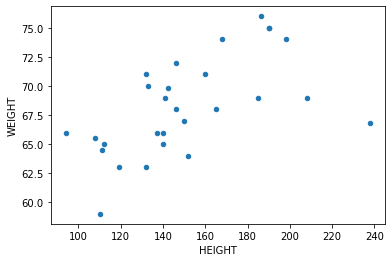

In [7]:
df = df[df["HEIGHT"] < 1000]
df.plot.scatter("HEIGHT", "WEIGHT")

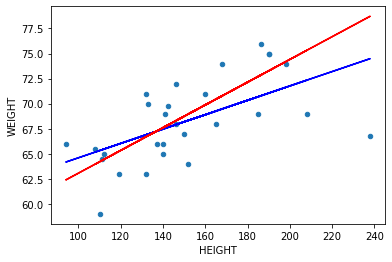

In [8]:
df.plot.scatter("HEIGHT", "WEIGHT")

heights, weights = df["HEIGHT"].values, df["WEIGHT"].values
heights_2d = heights.reshape(-1, 1)

# Least squares line (blue)
reg = LinearRegression()
reg.fit(heights_2d, weights)
predicted_weights_rss = reg.predict(heights_2d)
plt.plot(heights, predicted_weights_rss, color="blue")

# Resistant line (red)
x_h, x_l = np.quantile(heights, 5/6), np.quantile(heights, 1/6)
y_h, y_l = np.quantile(weights, 5/6), np.quantile(weights, 1/6)
slope_rl = (y_h - y_l) / (x_h - x_l)
a_rl = np.median([weight - slope_rl * height for weight, height in df.values])
predicted_weights_rl = [a_rl + slope_rl * height for height in heights]
plt.plot(heights, predicted_weights_rl, color="red")

In [9]:
print(f"RSS line slope: {reg.coef_[0]:.3f}")
print(f"RSS score: {reg.score(heights_2d, weights):.3f}")
print(f"Pearson score: {np.corrcoef(heights, weights)[0][1]:.3f}")

RSS line slope: 0.072
RSS score: 0.343
Pearson score: 0.586


# Problem 2

In [10]:
norm_rv = norm(loc=5.0, scale=1.0)
X = norm_rv.rvs(30)
Y = 5 * X + 2

In [11]:
print(f"Pearson score: {np.corrcoef(X, Y)[0][1]}")

Pearson score: 1.0


In [12]:
reg = LinearRegression()
reg.fit(X.reshape(-1, 1), Y)
print(f"The slope is: {reg.coef_[0]}")

The slope is: 5.0


In [13]:
noise = norm.rvs(loc=0, scale=1, size=30)
Y = Y + noise

reg = LinearRegression()
reg.fit(X.reshape(-1, 1), Y)

print(f"Pearson score (noisy vector): {np.corrcoef(X, Y)[0][1]}")
print(f"The slope is (noisy vector): {reg.coef_[0]}")

Pearson score (noisy vector): 0.9816673424128409
The slope is (noisy vector): 4.993016976803561


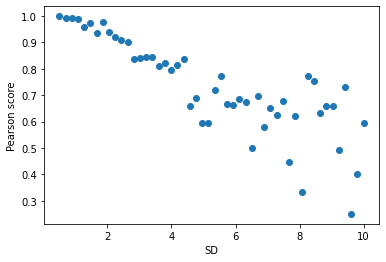

In [14]:
X = norm_rv.rvs(30)

scales_vec = np.linspace(start=0.5, stop=10, num=50)
slopes, pearson_scores = [], []

for scale in scales_vec:
  Y = 5 * X + 2 + norm.rvs(loc=0, scale=scale, size=30)

  reg = LinearRegression()
  reg.fit(X.reshape(-1, 1), Y)
  slopes.append(reg.coef_[0])
  pearson_scores.append(np.corrcoef(X, Y)[0][1])

plt.xlabel("SD")
plt.ylabel("Pearson score")
plt.scatter(scales_vec, pearson_scores)

#Problem 3

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress as lm

In [36]:
df = pd.DataFrame(pd.read_csv("countries.csv"))

income = df["income"]
education = df["education"]
life_expectancy = df["life_expectancy"]
life_income = lm(income, life_expectancy)
life_education = lm(education, life_expectancy)
print(f"Regression line for life_expectancy and income: Y = {life_income.intercept:.2f} + {life_income.slope:.2f}X")
print(f"Regression line for life_expectancy and education: Y = {life_education.intercept:.2f} + {life_education.slope:.2f}X")
print(f"R-squared for life_income: {life_income.rvalue**2:.2f}")
print(f"R-squared for life_education: {life_education.rvalue**2:.2f}")
print("life_income has greater explained variation which is not supprising.")

Regression line for life_expectancy and income: Y = 67.88 + 0.00X
Regression line for life_expectancy and education: Y = 63.15 + 0.85X
R-squared for life_income: 0.39
R-squared for life_education: 0.10
life_income has greater explained variation which is not supprising.


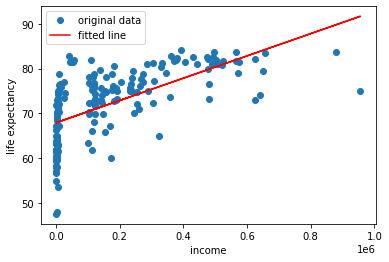

In [22]:
plt.plot(income, life_expectancy, 'o', label='original data')
plt.plot(income, life_income.intercept + life_income.slope*income, 'r', label='fitted line')
plt.xlabel("income")
plt.ylabel("life expectancy")
plt.legend()
plt.show()

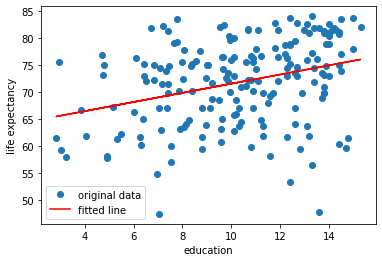

In [23]:
plt.plot(education, life_expectancy, 'o', label='original data')
plt.plot(education, life_education.intercept + life_education.slope*education, 'r', label='fitted line')
plt.xlabel("education")
plt.ylabel("life expectancy")
plt.legend()
plt.show()

In [34]:
log_income = np.log(income)
life_log_income = lm(log_income, life_expectancy)
log_education = np.log(education)
life_log_education = lm(log_education, life_expectancy)
print(f"Regression line for life_expectancy and log(income): Y = {life_log_income.intercept:.2f} + {life_log_income.slope:.2f}X")
print(f"Regression line for life_expectancy and log(education): Y = {life_log_education.intercept:.2f} + {life_log_education.slope:.2f}X")
print(f"R-squared for life_log_income: {life_log_income.rvalue**2:.2f}")
print(f"R-squared for life_log_education: {life_log_education.rvalue**2:.2f}")


Regression line for life_expectancy and log(income): Y = 42.71 + 2.77X
Regression line for life_expectancy and log(education): Y = 55.26 + 7.28X
R-squared for life_log_income: 0.59
R-squared for life_log_education: 0.10


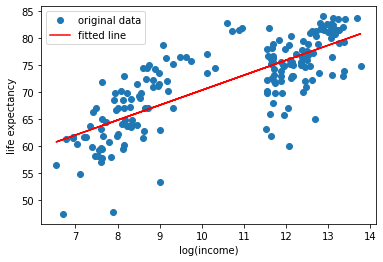

In [26]:
plt.plot(log_income, life_expectancy, 'o', label='original data')
plt.plot(log_income, life_log_income.intercept + life_log_income.slope*log_income, 'r', label='fitted line')
plt.xlabel("log(income)")
plt.ylabel("life expectancy")
plt.legend()
plt.show()

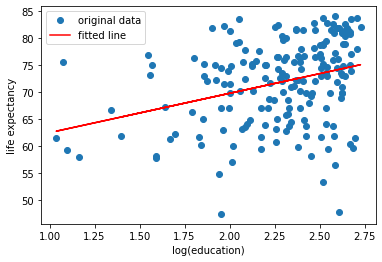

In [27]:
plt.plot(log_education, life_expectancy, 'o', label='original data')
plt.plot(log_education, life_log_education.intercept + life_log_education.slope*log_education, 'r', label='fitted line')
plt.xlabel("log(education)")
plt.ylabel("life expectancy")
plt.legend()
plt.show()